In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\danma\\OneDrive\\Documents\\GitHub\\capstone2023'

In [3]:
df = pd.read_csv('Data\Combined2_DateFrames.csv', low_memory=False)

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,OccuredAt,Status
0,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 11:11,REG
1,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 11:12,RAC
2,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 11:14,RAC
3,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 11:16,RAC
4,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,21/10/2021 13:08,RAC
...,...,...,...,...,...,...,...,...,...
234542,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,23/12/2022 06:33,REG
234543,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,08/01/2023 14:42,RAC
234544,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,21/02/2023 09:58,RAC
234545,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,20/05/2023 09:49,RAC


In [6]:
# Convert 'OccurredAt' column to datetime
df["OccuredAt"] = pd.to_datetime(df["OccuredAt"])

In [85]:
# Sort DataFrame based on 'OccurredAt' in descending order
df = df.sort_values(by="OccuredAt", ascending=False)

In [7]:
# Find the unique earmarks
unique_earmarks = df["Earmark"].unique()

In [8]:
# Update 'Status' column for the last entry in each group
for earmark in unique_earmarks:
    last_row_index = df[df["Earmark"] == earmark].index[0]
    df.at[last_row_index, "Status"] = df.at[last_row_index, "Retirement Type"]

In [90]:
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [9]:
df1 = df

In [10]:
# Write DataFrame to a CSV file with the specified date format
#df.to_csv("output.csv", index=False)

In [11]:
#df = pd.read_csv('output.csv', low_memory=False)

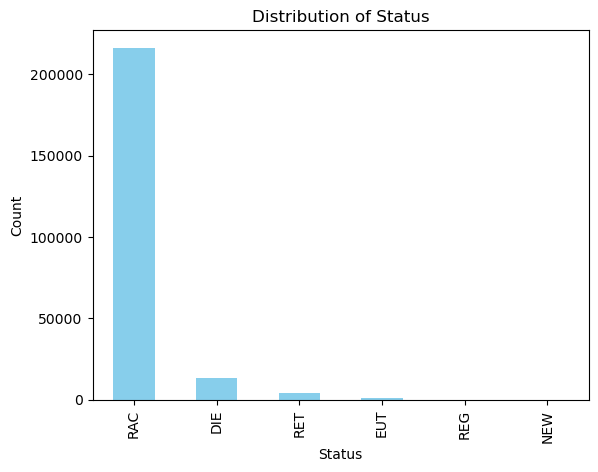

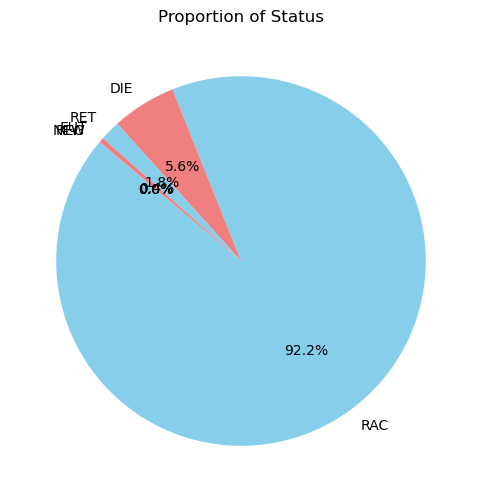

In [12]:
import matplotlib.pyplot as plt
# Plot a bar chart to show the distribution of 'Status'
status_counts = df["Status"].value_counts()
status_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

# Plot a pie chart to show the proportion of each 'Status'
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=140, colors=["skyblue", "lightcoral"])
plt.title("Proportion of Status")
plt.show()

In [13]:
subset = df[['OccuredAt','Status']]

In [14]:
subset["OccuredAt"] = pd.to_datetime(subset["OccuredAt"]);

C:\Users\danma\AppData\Local\Temp\ipykernel_10740\1398405935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["OccuredAt"] = pd.to_datetime(subset["OccuredAt"]);


In [15]:
# Set "OccurredAt" as the index
subset.set_index("OccuredAt", inplace=True)

In [16]:

# Plot the time series
#plt.figure(figsize=(10, 6))
#plt.plot(subset.index, subset["Status"], marker='o')
#plt.title("Time Series of Status")
#plt.xlabel("Time")
#plt.ylabel("Status")
#plt.grid(True)
#plt.show()

In [17]:
# Resample the data to a weekly frequency and count the occurrences of each status
#resampled_df = df.resample("W").count()

In [18]:
df["OccuredAt"] = pd.to_datetime(df["OccuredAt"])

# Set "OccurredAt" as the index
df.set_index("OccuredAt", inplace=True)

# Resample the data to a weekly frequency and count the occurrences of each status
resampled_df = df.resample("W").count()

In [19]:
resampled_df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
OccuredAt,,,,,,,,
2021-01-10,30,30,30,30,30,30,30,30
2021-01-17,76,76,76,76,76,76,76,76
2021-01-24,0,0,0,0,0,0,0,0
2021-01-31,0,0,0,0,0,0,0,0
2021-02-07,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2023-11-12,238,242,242,238,238,238,238,242
2023-11-19,0,0,0,0,0,0,0,0
2023-11-26,0,0,0,0,0,0,0,0


In [20]:
df

,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
OccuredAt,,,,,,,,
2021-10-21 11:11:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,DIE
2021-10-21 11:12:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,RAC
2021-10-21 11:14:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,RAC
2021-10-21 11:16:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,RAC
2021-10-21 13:08:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,RAC
...,...,...,...,...,...,...,...,...
2022-12-23 06:33:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,EUT
2023-08-01 14:42:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,RAC
2023-02-21 09:58:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,RAC


In [21]:
df.reset_index(inplace = True)

In [22]:
df

,OccuredAt,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
0,2021-10-21 11:11:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,DIE
1,2021-10-21 11:12:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,RAC
2,2021-10-21 11:14:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,RAC
3,2021-10-21 11:16:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,RAC
4,2021-10-21 13:08:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,22/09/2014,DIE,RAC
...,...,...,...,...,...,...,...,...,...
234542,2022-12-23 06:33:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,EUT
234543,2023-08-01 14:42:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,RAC
234544,2023-02-21 09:58:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,RAC
234545,2023-05-20 09:49:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,02/09/2022,EUT,RAC


In [23]:
df["Whelp Date"] = pd.to_datetime(df["Whelp Date"])
df["OccuredAt"] = pd.to_datetime(df["OccuredAt"])

C:\Users\danma\AppData\Local\Temp\ipykernel_10740\3838613621.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Whelp Date"] = pd.to_datetime(df["Whelp Date"])


In [24]:
# Filter data for greyhounds with "RET" (Death) status
ret_data = df[df["Status"] == "RET"]

In [25]:
# Filter data for greyhounds with "RET" (Death) status and valid OccuredAt dates
ret_data = df[(df["Status"] == "RET") & (~df["OccuredAt"].isnull())]

In [26]:
ret_data

,OccuredAt,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
143,2022-11-02 06:07:00,ARCHATON MIA,RDHBU,9.722740e+14,27/09/2017,B,2016-02-10,RET,RET
225,2021-10-28 11:25:00,SUBTLE DIVA,RHXDI,9.722740e+14,01/11/2017,B,2016-08-10,RET,RET
269,2021-12-26 10:06:00,EXIT RUBY,STHBY,9.722740e+14,21/12/2017,D,2017-02-09,RET,RET
458,2021-10-20 15:49:00,LAWLESS CAESAR,RNPYH,9.722740e+14,10/01/2018,D,2016-09-27,RET,RET
936,2021-09-10 18:39:00,PAINTED PAWS,RUMVX,9.722740e+14,28/02/2018,D,2016-01-12,RET,RET
...,...,...,...,...,...,...,...,...,...
232230,2022-06-02 06:21:00,MULCAIR JET,THRDA,9.722740e+14,29/08/2019,D,2018-02-08,RET,RET
232259,2021-04-10 12:36:00,BERETTA HANK,UUTDS,9.722740e+14,14/09/2020,D,2019-12-08,RET,RET
232359,2021-07-09 06:02:00,KEEL SPY,YUJ3,9.530100e+14,24/06/2020,D,2018-02-21,RET,RET
232381,2022-12-03 06:00:00,COLMYARO JACK,XXZMA,9.772000e+14,08/06/2021,D,2020-06-16,RET,RET


In [27]:
# Calculate the time difference in days between Whelp Date and OccuredAt
ret_data["Days_Lived"] = (ret_data["OccuredAt"] - ret_data["Whelp Date"]).dt.days

C:\Users\danma\AppData\Local\Temp\ipykernel_10740\3479783897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_data["Days_Lived"] = (ret_data["OccuredAt"] - ret_data["Whelp Date"]).dt.days


In [28]:
ret_data["Days_Lived"]

143       2457.0
225       1905.0
269       1781.0
458       1849.0
936       2068.0
           ...  
232230    1575.0
232259     489.0
232359    1234.0
232381     900.0
232398     880.0
Name: Days_Lived, Length: 3110, dtype: float64

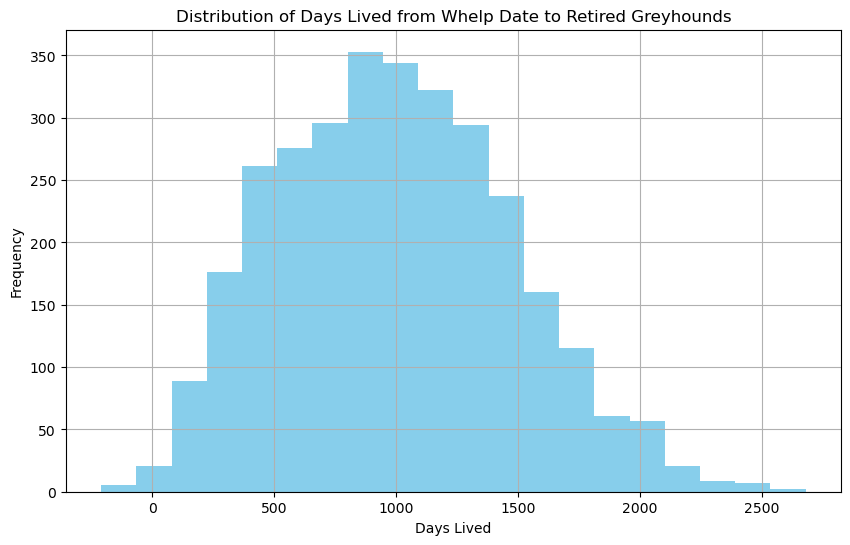

In [29]:
# Plot a histogram of days lived
plt.figure(figsize=(10, 6))
plt.hist(ret_data["Days_Lived"], bins=20, color="skyblue")
plt.title("Distribution of Days Lived from Whelp Date to Retired Greyhounds")
plt.xlabel("Days Lived")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [30]:
# Print descriptive statistics
print(ret_data["Days_Lived"].describe())

count    3106.000000
mean      996.662267
std       477.989824
min      -210.000000
25%       635.250000
50%       977.000000
75%      1319.750000
max      2680.000000
Name: Days_Lived, dtype: float64


The distribution of the time from "Whelp Date" to "Death" is not typically expected to be normally distributed.<BR> The lifespan of living organisms, including greyhounds, can often follow more complex patterns due to various factors such as genetics, environment, health, and more. As a result, the distribution of lifespans can be skewed, have multiple peaks, or exhibit other non-normal characteristics.

If you plot the distribution of days lived from "Whelp Date" to "Death," you might find that the distribution is more likely to be right-skewed. This means that there may be a larger number of greyhounds with shorter lifespans and a smaller number with longer lifespans. The presence of outliers (greyhounds with exceptionally long lifespans) could further contribute to the non-normal distribution.

A histogram or a kernel density plot can provide a visual representation of the distribution. Additionally, you can use summary statistics such as mean, median, and standard deviation to quantify the central tendency and spread of the distribution.

In [31]:
df

,OccuredAt,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
0,2021-10-21 11:11:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,2014-09-22,DIE,DIE
1,2021-10-21 11:12:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,2014-09-22,DIE,RAC
2,2021-10-21 11:14:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,2014-09-22,DIE,RAC
3,2021-10-21 11:16:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,2014-09-22,DIE,RAC
4,2021-10-21 13:08:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,2014-09-22,DIE,RAC
...,...,...,...,...,...,...,...,...,...
234542,2022-12-23 06:33:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,2022-02-09,EUT,EUT
234543,2023-08-01 14:42:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,2022-02-09,EUT,RAC
234544,2023-02-21 09:58:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,2022-02-09,EUT,RAC
234545,2023-05-20 09:49:00,NaN,YDUZE,9.770000e+14,02/09/2022,D,2022-02-09,EUT,RAC


In [32]:
# Filter data for greyhounds with "DIE" (Death) status
die_data = df[df["Status"] == "DIE"]

In [33]:
die_data

,OccuredAt,Greyhound Name,Earmark,Microchip,Reg Date,Sex,Whelp Date,Retirement Type,Status
0,2021-10-21 11:11:00,JEWEL MAIDEN,PLPIQ,9.722740e+14,29/09/2015,B,2014-09-22,DIE,DIE
7,2022-02-27 09:30:00,BULLET ENDA,QPBVB,9.810980e+14,11/02/2016,B,2015-05-04,DIE,DIE
11,2022-02-27 09:30:00,FLEXIBLE PANGO,QRHSP,9.810980e+14,23/09/2016,B,2015-01-09,DIE,DIE
14,2022-02-27 09:30:00,FLEXIBLE TANGO,QRLED,9.810980e+14,23/09/2016,B,2015-01-09,DIE,DIE
17,2021-10-09 11:17:00,BLACK RIOGA,QPYAK,9.810980e+14,02/11/2016,D,2015-10-26,DIE,DIE
...,...,...,...,...,...,...,...,...,...
187564,2023-05-17 06:35:00,NaN,ZVTIZ,9.772000e+14,12/01/2023,B,2023-12-01,DIE,DIE
187565,2023-05-18 06:34:00,NaN,ZHESX,9.772000e+14,01/02/2023,D,2023-01-02,DIE,DIE
187570,2023-05-18 06:34:00,NaN,ZBXRJ,9.772000e+14,20/01/2023,D,2023-01-20,DIE,DIE
187573,2023-06-15 06:32:00,NaN,ZTVSV,9.772000e+14,12/03/2023,D,2023-12-03,DIE,DIE


In [34]:
# Calculate the time difference in days between Whelp Date and OccuredAt
die_data["Days_Lived"] = (die_data["OccuredAt"] - die_data["Whelp Date"]).dt.days

C:\Users\danma\AppData\Local\Temp\ipykernel_10740\1960019408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  die_data["Days_Lived"] = (die_data["OccuredAt"] - die_data["Whelp Date"]).dt.days


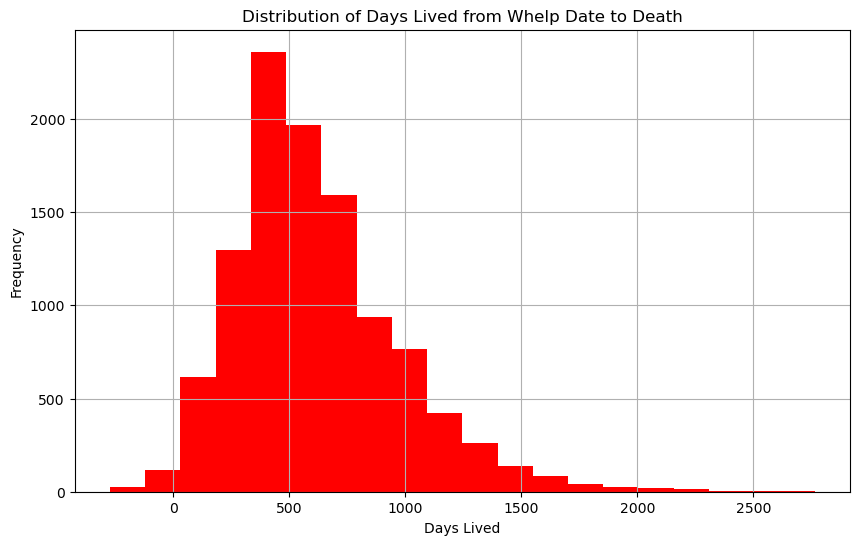

In [35]:
# Plot a histogram of days lived
plt.figure(figsize=(10, 6))
plt.hist(die_data["Days_Lived"], bins=20, color="red")
plt.title("Distribution of Days Lived from Whelp Date to Death")
plt.xlabel("Days Lived")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [36]:
# Print descriptive statistics
print(die_data["Days_Lived"].describe())

count    10689.000000
mean       616.157171
std        353.609157
min       -272.000000
25%        372.000000
50%        553.000000
75%        800.000000
max       2764.000000
Name: Days_Lived, dtype: float64


In [37]:
# Filter data for greyhounds with "DIE" (Death) status
eut_data = df[df["Status"] == "EUT"]

In [38]:
# Calculate the time difference in days between Whelp Date and OccuredAt
eut_data["Days_Lived"] = (eut_data["OccuredAt"] - eut_data["Whelp Date"]).dt.days

C:\Users\danma\AppData\Local\Temp\ipykernel_10740\4021014414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eut_data["Days_Lived"] = (eut_data["OccuredAt"] - eut_data["Whelp Date"]).dt.days


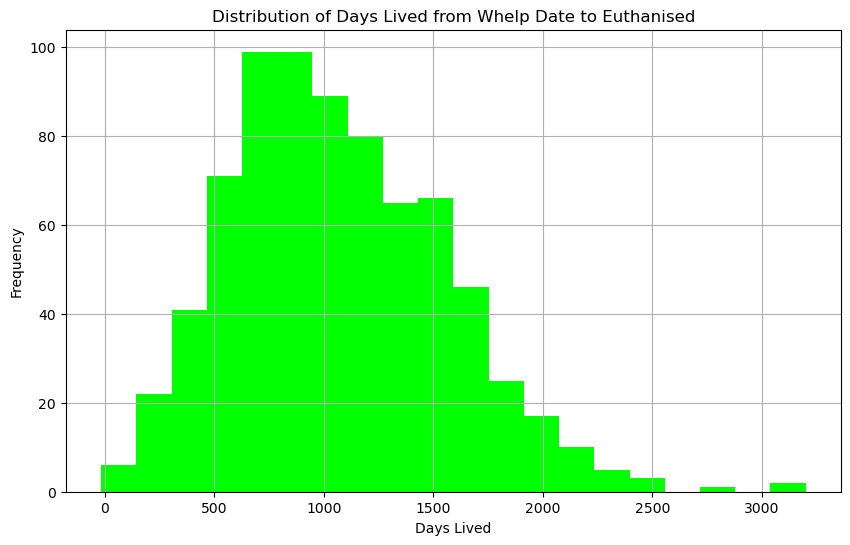

In [123]:
# Plot a histogram of days lived
plt.figure(figsize=(10, 6))
plt.hist(eut_data["Days_Lived"], bins=20, color="lime")
plt.title("Distribution of Days Lived from Whelp Date to Euthanised")
plt.xlabel("Days Lived")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

right skewed

In [39]:
# Count the number of updates for each earmark
updates_count = df.groupby("Earmark")["Earmark"].count()

In [40]:
updates_count

Earmark
AAM2     8
AAT3     4
AAT9     7
AAV1    12
AAX4     5
        ..
ZZDB     1
ZZK1    16
ZZK4    10
ZZK8     8
ZZP2     6
Name: Earmark, Length: 18384, dtype: int64